Required imports

In [302]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

### DATA UNDERSTANDING

Core dataset Orders

In [303]:
orders = pd.read_csv('data/olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Load all necessary data

In [304]:
customers = pd.read_csv('data/olist_customers_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')

Inspect the review score

In [305]:
order_reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [306]:
order_reviews['review_score'].describe()

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

### DATA PREPARATION

Connect all tables to one dataset

In [307]:
# Customers
merged1 = pd.merge(orders, customers, how='left', on='customer_id')

# Order_items
merged2 = pd.merge(merged1, order_items, how='left', on='order_id')

# Order_payments
merged3 = pd.merge(merged2, order_payments, how='left', on='order_id')

# Order_reviews
merged4 = pd.merge(merged3, order_reviews, how='left', on='order_id')

# Products
merged5 = pd.merge(merged4, products, how='left', on='product_id')

# Sellers
merged6 = pd.merge(merged5, sellers, how='left', on='seller_id')

data = merged6
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602.0,tupa,SP
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,8290.0,sao paulo,SP
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175.0,ilicinea,MG
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175.0,ilicinea,MG


Remove all columns containing an ID

In [308]:
# Remove id columns
for col in data.columns:
    if 'id' in col:
        data.drop(col, axis=1, inplace=True)

data

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,shipping_limit_date,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,seller_zip_code_prefix,seller_city,seller_state
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP,2017-10-06 11:07:15,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,9350.0,maua,SP
1,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP,2017-10-06 11:07:15,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,9350.0,maua,SP
2,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP,2017-10-06 11:07:15,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,9350.0,maua,SP
3,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,47813,barreiras,BA,2018-07-30 03:24:27,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,31570.0,belo horizonte,SP
4,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,75265,vianopolis,GO,2018-08-13 08:55:23,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,14840.0,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,11722,praia grande,SP,2018-02-12 13:10:37,...,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,17602.0,tupa,SP
119139,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,45920,nova vicosa,BA,2017-09-05 15:04:16,...,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,8290.0,sao paulo,SP
119140,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,28685,japuiba,RJ,2018-01-12 21:36:21,...,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,37175.0,ilicinea,MG
119141,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,28685,japuiba,RJ,2018-01-12 21:36:21,...,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,37175.0,ilicinea,MG


Create categorical encoded variables for string categories (dummy variables)

In [309]:
data['order_status'] = pd.factorize(data['order_status'])[0].astype(float)
data['customer_zip_code_prefix'] = pd.factorize(data['customer_zip_code_prefix'])[0].astype(float)
data['customer_city'] = pd.factorize(data['customer_city'])[0].astype(float)
data['customer_state'] = pd.factorize(data['customer_state'])[0].astype(float)
data['product_category_name'] = pd.factorize(data['product_category_name'])[0].astype(float)
data['seller_zip_code_prefix'] = pd.factorize(data['seller_zip_code_prefix'])[0].astype(float)
data['payment_type'] = pd.factorize(data['payment_type'])[0].astype(float)
data['seller_city'] = pd.factorize(data['seller_city'])[0].astype(float)
data['seller_state'] = pd.factorize(data['seller_state'])[0].astype(float)

data

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,shipping_limit_date,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,seller_zip_code_prefix,seller_city,seller_state
0,0.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,0.0,0.0,2017-10-06 11:07:15,...,0.0,40.0,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0
1,0.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,0.0,0.0,2017-10-06 11:07:15,...,0.0,40.0,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0
2,0.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,0.0,0.0,2017-10-06 11:07:15,...,0.0,40.0,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0
3,0.0,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,1.0,1.0,2018-07-30 03:24:27,...,1.0,29.0,178.0,1.0,400.0,19.0,13.0,1.0,1.0,0.0
4,0.0,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2.0,2.0,2.0,2018-08-13 08:55:23,...,2.0,46.0,232.0,1.0,420.0,24.0,19.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,0.0,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,8509.0,151.0,0.0,2018-02-12 13:10:37,...,15.0,52.0,828.0,4.0,4950.0,40.0,10.0,175.0,88.0,0.0
119139,0.0,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,14993.0,4118.0,1.0,2017-09-05 15:04:16,...,47.0,51.0,500.0,2.0,13300.0,32.0,90.0,881.0,5.0,0.0
119140,0.0,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1295.0,530.0,6.0,2018-01-12 21:36:21,...,8.0,59.0,1893.0,1.0,6550.0,20.0,20.0,37.0,25.0,1.0
119141,0.0,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1295.0,530.0,6.0,2018-01-12 21:36:21,...,8.0,59.0,1893.0,1.0,6550.0,20.0,20.0,37.0,25.0,1.0


Feature engineering based on available timestamps

In [310]:
# Create delivery duration column
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

data['duration_of_delivery'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.total_seconds()
data['offset_of_expectation'] = (data['order_estimated_delivery_date'] - data['order_delivered_customer_date']).dt.total_seconds()

data

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,shipping_limit_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,seller_zip_code_prefix,seller_city,seller_state,duration_of_delivery,offset_of_expectation
0,0.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,0.0,0.0,2017-10-06 11:07:15,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
1,0.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,0.0,0.0,2017-10-06 11:07:15,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
2,0.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,0.0,0.0,2017-10-06 11:07:15,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
3,0.0,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,1.0,1.0,2018-07-30 03:24:27,...,178.0,1.0,400.0,19.0,13.0,1.0,1.0,0.0,1190768.0,462735.0
4,0.0,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2.0,2.0,2.0,2018-08-13 08:55:23,...,232.0,1.0,420.0,24.0,19.0,2.0,2.0,0.0,811660.0,1490011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,0.0,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,8509.0,151.0,0.0,2018-02-12 13:10:37,...,828.0,4.0,4950.0,40.0,10.0,175.0,88.0,0.0,1917538.0,109324.0
119139,0.0,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,14993.0,4118.0,1.0,2017-09-05 15:04:16,...,500.0,2.0,13300.0,32.0,90.0,881.0,5.0,0.0,2147854.0,477343.0
119140,0.0,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1295.0,530.0,6.0,2018-01-12 21:36:21,...,1893.0,1.0,6550.0,20.0,20.0,37.0,25.0,1.0,1476267.0,1729626.0
119141,0.0,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1295.0,530.0,6.0,2018-01-12 21:36:21,...,1893.0,1.0,6550.0,20.0,20.0,37.0,25.0,1.0,1476267.0,1729626.0


Drop unnecessary columns

In [311]:
data.drop(['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_status', 'shipping_limit_date'], axis=1, inplace=True)

data

,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,seller_zip_code_prefix,seller_city,seller_state,duration_of_delivery,offset_of_expectation
0,0.0,0.0,0.0,29.99,8.72,1.0,0.0,1.0,18.12,4.0,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
1,0.0,0.0,0.0,29.99,8.72,3.0,1.0,1.0,2.00,4.0,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
2,0.0,0.0,0.0,29.99,8.72,2.0,1.0,1.0,18.59,4.0,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
3,1.0,1.0,1.0,118.70,22.76,1.0,2.0,1.0,141.46,4.0,...,178.0,1.0,400.0,19.0,13.0,1.0,1.0,0.0,1190768.0,462735.0
4,2.0,2.0,2.0,159.90,19.22,1.0,0.0,3.0,179.12,5.0,...,232.0,1.0,420.0,24.0,19.0,2.0,2.0,0.0,811660.0,1490011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,8509.0,151.0,0.0,174.90,20.10,1.0,0.0,3.0,195.00,4.0,...,828.0,4.0,4950.0,40.0,10.0,175.0,88.0,0.0,1917538.0,109324.0
119139,14993.0,4118.0,1.0,205.99,65.02,1.0,0.0,5.0,271.01,5.0,...,500.0,2.0,13300.0,32.0,90.0,881.0,5.0,0.0,2147854.0,477343.0
119140,1295.0,530.0,6.0,179.99,40.59,1.0,0.0,4.0,441.16,2.0,...,1893.0,1.0,6550.0,20.0,20.0,37.0,25.0,1.0,1476267.0,1729626.0
119141,1295.0,530.0,6.0,179.99,40.59,1.0,0.0,4.0,441.16,2.0,...,1893.0,1.0,6550.0,20.0,20.0,37.0,25.0,1.0,1476267.0,1729626.0


Remove rows with empty values (or possibly infinite values)

In [312]:
data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

data

,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,seller_zip_code_prefix,seller_city,seller_state,duration_of_delivery,offset_of_expectation
0,0.0,0.0,0.0,29.99,8.72,1.0,0.0,1.0,18.12,4.0,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
1,0.0,0.0,0.0,29.99,8.72,3.0,1.0,1.0,2.00,4.0,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
2,0.0,0.0,0.0,29.99,8.72,2.0,1.0,1.0,18.59,4.0,...,268.0,4.0,500.0,19.0,8.0,0.0,0.0,0.0,728920.0,614087.0
3,1.0,1.0,1.0,118.70,22.76,1.0,2.0,1.0,141.46,4.0,...,178.0,1.0,400.0,19.0,13.0,1.0,1.0,0.0,1190768.0,462735.0
4,2.0,2.0,2.0,159.90,19.22,1.0,0.0,3.0,179.12,5.0,...,232.0,1.0,420.0,24.0,19.0,2.0,2.0,0.0,811660.0,1490011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,8509.0,151.0,0.0,174.90,20.10,1.0,0.0,3.0,195.00,4.0,...,828.0,4.0,4950.0,40.0,10.0,175.0,88.0,0.0,1917538.0,109324.0
119139,14993.0,4118.0,1.0,205.99,65.02,1.0,0.0,5.0,271.01,5.0,...,500.0,2.0,13300.0,32.0,90.0,881.0,5.0,0.0,2147854.0,477343.0
119140,1295.0,530.0,6.0,179.99,40.59,1.0,0.0,4.0,441.16,2.0,...,1893.0,1.0,6550.0,20.0,20.0,37.0,25.0,1.0,1476267.0,1729626.0
119141,1295.0,530.0,6.0,179.99,40.59,1.0,0.0,4.0,441.16,2.0,...,1893.0,1.0,6550.0,20.0,20.0,37.0,25.0,1.0,1476267.0,1729626.0


Split data into train and test set

In [313]:
X = data.drop('review_score', axis=1)
y = data['review_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### MODELING

k-Nearest neighbor classifier

In [314]:
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
knn_pred = kNN.predict(X_test)
kNN.score(X_test, y_test)

0.5367088607594936

Decision Tree

In [315]:
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc.score(X_test, y_test)

0.5338239623196939

Naive Bayes

In [316]:
from sklearn.naive_bayes import GaussianNB
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb.score(X_test, y_test)

0.5843096850161907

Random Forest

In [317]:
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.6825434206652929

Gradient Boosting

In [318]:
from sklearn.ensemble import GradientBoostingClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc.score(X_test, y_test)

0.6103915219311157

Logistic Regression

In [319]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
lr = LogisticRegression(max_iter=1000000,multi_class='multinomial')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.5996173093906388

### EVALUATION

Calculate confusion matrices

In [320]:
from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# kNN
knn_cm = confusion_matrix(y_test, knn_pred, labels=[1, 2, 3, 4, 5])

# Decision tree
dtc_cm = confusion_matrix(y_test, dtc_pred, labels=[1, 2, 3, 4, 5])

# Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred, labels=[1, 2, 3, 4, 5])

# Random Forest
rfc_cm = confusion_matrix(y_test, rfc_pred, labels=[1, 2, 3, 4, 5])

# Gradient Boosting
gbc_cm = confusion_matrix(y_test, gbc_pred, labels=[1, 2, 3, 4, 5])

# Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred, labels=[1, 2, 3, 4, 5])

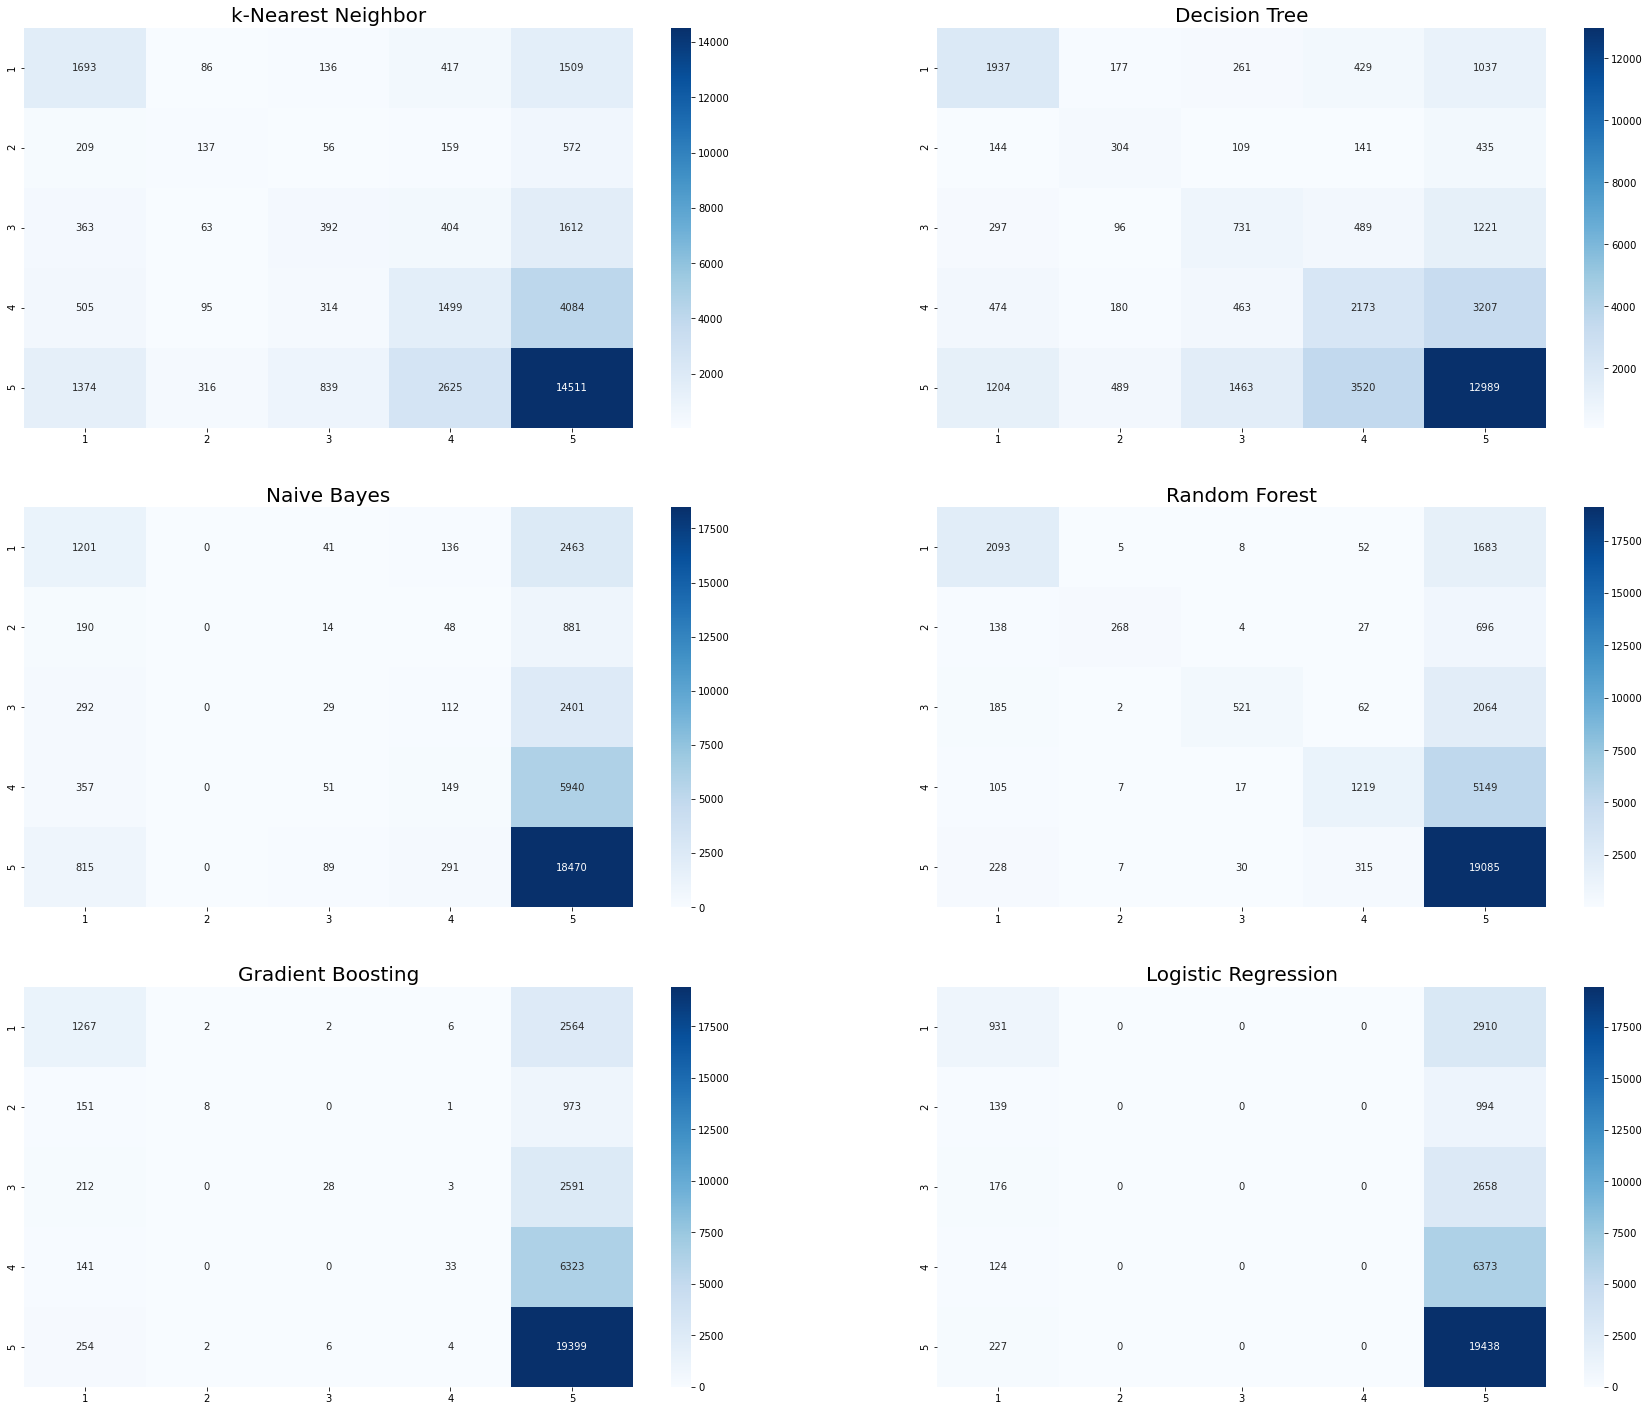

In [321]:
import matplotlib.pyplot as plt
import seaborn as sn


fig = plt.figure(figsize = (30,25))

plt.subplot(3, 2, 1)
plt.gca().set_title('k-Nearest Neighbor', {'fontsize': '20'})
sn.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])

plt.subplot(3, 2, 2)
plt.gca().set_title('Decision Tree', {'fontsize': '20'})
sn.heatmap(dtc_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])

plt.subplot(3, 2, 3)
plt.gca().set_title('Naive Bayes', {'fontsize': '20'})
sn.heatmap(nb_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])

plt.subplot(3, 2, 4)
plt.gca().set_title('Random Forest', {'fontsize': '20'})
sn.heatmap(rfc_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])

plt.subplot(3, 2, 5)
plt.gca().set_title('Gradient Boosting', {'fontsize': '20'})
sn.heatmap(gbc_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])

plt.subplot(3, 2, 6)
plt.gca().set_title('Logistic Regression', {'fontsize': '20'})
sn.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])

plt.show()